# NRC Emotional Lexicon

Αυτό είναι το [NRC Emotional Lexicon](http://saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm): "The NRC Emotion Lexicon is a list of English words and their associations with eight basic emotions (anger, fear, anticipation, trust, surprise, sadness, joy, and disgust) and two sentiments (negative and positive). The annotations were manually done by crowdsourcing."



In [81]:
import pandas as pd

In [82]:
filepath = "NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df.head()

,word,emotion,association
0,aback,anger,0
1,aback,anticipation,0
2,aback,disgust,0
3,aback,fear,0
4,aback,joy,0


Είναι αρκετά εύκολο. Μια στήλη με τη λέξη, μια για το συναίσθημα και μία για την συσχέτιση.  
Βλέπετε το "aback aback aback aback" επειδή υπάρχει μια γραμμή για κάθε ζευγάρι λέξης-συναισθήματος. 

## Ποια συναισθήματα υπάρχουν?


In [83]:
emolex_df.emotion.unique()

array(['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative',
       'positive', 'sadness', 'surprise', 'trust'], dtype=object)

In [84]:
emolex_df.emotion.value_counts()

surprise        14182
anticipation    14182
trust           14182
anger           14182
joy             14182
sadness         14182
disgust         14182
positive        14182
fear            14182
negative        14182
Name: emotion, dtype: int64

## Πόσες λέξεις έχει κάθε συναίσθημα?

Κάθε συναίσθημα δεν έχει 14182 λέξεις που σχετίζονται με αυτό, αλλά το  `1` σημαίνει "σχετίζεται" και `0` σημαίνει "δεν σχετίζεται"


In [85]:
emolex_df[emolex_df.association == 1].emotion.value_counts()

negative        3324
positive        2312
fear            1476
anger           1247
trust           1231
sadness         1191
disgust         1058
anticipation     839
joy              689
surprise         534
Name: emotion, dtype: int64

## Ποιες λέξεις δείχνουν θυμό?

In [86]:
emolex_df[(emolex_df.association == 1) & (emolex_df.emotion == 'anger')].word

30          abandoned
40        abandonment
170             abhor
180         abhorrent
270           abolish
             ...     
141220       wrongful
141230        wrongly
141470           yell
141500           yelp
141640          youth
Name: word, Length: 1247, dtype: object

## Μπορούμε να αλλάξουμε τον τρόπο που εμφανίζονται οι στήλες και οι γραμμές


In [87]:
emolex_words = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index()
emolex_words.head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,NaN,0,0,0,0,0,0,0,0,0,0
1,aback,0,0,0,0,0,0,0,0,0,0
2,abacus,0,0,0,0,0,0,0,0,0,1
3,abandon,0,0,0,1,0,1,0,1,0,0
4,abandoned,1,0,0,1,0,1,0,1,0,0


Επίσης, μπορούμε να ψάξουμε συγκεκριμένες λέξεις...

In [88]:
emolex_words[emolex_words.word == 'charitable']

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
2002,charitable,0,1,0,0,1,0,1,0,0,1


...ή συγκεκριμένα συναισθήματα...

In [89]:
emolex_words[emolex_words.anger == 1].head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
4,abandoned,1,0,0,1,0,1,0,1,0,0
5,abandonment,1,0,0,1,0,1,0,1,1,0
18,abhor,1,0,1,1,0,1,0,0,0,0
19,abhorrent,1,0,1,1,0,1,0,0,0,0
28,abolish,1,0,0,0,0,1,0,0,0,0


...ή πολλά συναισθήματα μαζί!

In [90]:
emolex_words[(emolex_words.joy == 1) & (emolex_words.negative == 1)].head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
62,abundance,0,1,1,0,1,1,1,0,0,1
1019,balm,0,1,0,0,1,1,1,0,0,0
1383,boisterous,1,1,0,0,1,1,1,0,0,0
1917,celebrity,1,1,1,0,1,1,1,0,1,1
2005,charmed,0,0,0,0,1,1,1,0,0,0


Το χρήσιμο κομμάτι είναι να χρησιμοποιήσουμε λέξεις που αντιστοιχούν σε **ένα συναίσθημα**

In [91]:
# Angry words
emolex_words[emolex_words.anger == 1].word

4          abandoned
5        abandonment
18             abhor
19         abhorrent
28           abolish
            ...     
14122       wrongful
14123        wrongly
14147           yell
14150           yelp
14164          youth
Name: word, Length: 1247, dtype: object

## Τώρα θα εισάγουμε ένα αρχείο με δεδομένα για να μετρήσουμε τα συναισθήματα!

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
import time
import os
import ast
from datetime import datetime
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np

import itertools
import re


import nltk
from nltk.corpus import stopwords


In [93]:
df = pd.read_csv('news.csv', nrows=500) #epilegoume posa rows theloume na fortwsoume

In [94]:
## Για να βλέπουμε όλες τις στήλες και τις γραμμές 

pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [95]:
df.shape

(500, 28)

In [96]:
print("Number of articles scraped (before cleaning): ", df.shape[0])

Number of articles scraped (before cleaning):  500


In [97]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,date,year,month,day,author,title,article,url,section,publication,full_response,article_url,fb_shares,loveCount,wowCount,sadCount,angryCount,thankfulCount,likeCount,hahaCount,commentCount,fb_type,fb_image,upvotes,reddit_comments
0,0,0,0,2016-12-09 18:31:00,2016,12.0,9,Lee Drutman,We should take concerns about the health of li...,"This post is part of Polyarchy, an independent...",https://www.vox.com/polyarchy/2016/12/9/138983...,NaN,Vox,"{'posts': [{'id': 7281564964, 'platformId': '2...",https://www.vox.com/polyarchy/2016/12/9/138983...,113.0,4.0,12.0,45.0,29.0,0.0,575.0,5.0,121.0,photo,https://external.xx.fbcdn.net/safe_image.php?d...,NaN,NaN
1,1,1,1,2016-10-07 21:26:46,2016,10.0,7,Scott Davis,Colts GM Ryan Grigson says Andrew Luck's contr...,The Indianapolis Colts made Andrew Luck the h...,https://www.businessinsider.com/colts-gm-ryan-...,NaN,Business Insider,"{'posts': [{'id': 6583051311, 'platformId': '1...",https://www.businessinsider.com/colts-gm-ryan-...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,6.0,photo,https://external.xx.fbcdn.net/safe_image.php?d...,NaN,NaN
2,2,2,2,2018-01-26 00:00:00,2018,1.0,26,NaN,Trump denies report he ordered Mueller fired,"DAVOS, Switzerland (Reuters) - U.S. President ...",https://www.reuters.com/article/us-davos-meeti...,Davos,Reuters,"{'posts': [{'id': 23371385573, 'platformId': '...",https://www.reuters.com/article/us-davos-meeti...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,photo,https://external.xx.fbcdn.net/safe_image.php?d...,NaN,NaN
3,3,3,3,2019-06-27 00:00:00,2019,6.0,27,NaN,France's Sarkozy reveals his 'Passions' but in...,PARIS (Reuters) - Former French president Nico...,https://www.reuters.com/article/france-politic...,World News,Reuters,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,4,2016-01-27 00:00:00,2016,1.0,27,NaN,Paris Hilton: Woman In Black For Uncle Monty's...,Paris Hilton arrived at LAX Wednesday dressed ...,https://www.tmz.com/2016/01/27/paris-hilton-mo...,NaN,TMZ,"{'posts': [{'id': 2044643148, 'platformId': '5...",https://www.tmz.com/2016/01/27/paris-hilton-mo...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,photo,https://external.xx.fbcdn.net/safe_image.php?d...,NaN,NaN



# Converting Strings to Floats

Βλέπουμε αν χρειάζεται να αλλάξουμε τον τύπο κάποιου αρχείου

### Preview of DataTypes

In [98]:
df.dtypes

Unnamed: 0           int64
Unnamed: 0.1         int64
Unnamed: 0.1.1       int64
date                object
year                 int64
month              float64
day                  int64
author              object
title               object
article             object
url                 object
section             object
publication         object
full_response       object
article_url         object
fb_shares          float64
loveCount          float64
wowCount           float64
sadCount           float64
angryCount         float64
thankfulCount      float64
likeCount          float64
hahaCount          float64
commentCount       float64
fb_type             object
fb_image            object
upvotes            float64
reddit_comments    float64
dtype: object

## Ελέγχουμε για διπλές γραμμές

In [99]:
df.drop_duplicates(inplace=True)

In [100]:
## Όταν  πετάμε γραμμές και αλλάζει η μορφή  του dataframe  πρεπει να  ξαναφτιάξουμε το  index

In [101]:
df = df.reset_index(drop=True)

In [102]:
df.shape

(500, 28)

In [103]:
## Τσεκάρουμε 

In [104]:
df[df.likeCount.isnull()].shape

(307, 28)

In [105]:
df[df.likeCount.notnull()].shape

(193, 28)

## Κάνουμε τις κενές τιμές 0

In [106]:
df = df.replace(np.nan, '0')

In [107]:
#τσεκάρουμε

In [108]:
df[df.likeCount.isnull()].shape

(0, 28)

In [109]:
#ποιοι έγραψαν  τα πιο πολλά άρθρα?
df['author'].value_counts().head(10)

0                            140
Kurt Wagner                    8
Noisey Staff                   6
VICE News                      6
Dara Lind                      5
VICE Staff                     5
Tess Owen                      5
Libby Nelson                   4
Alexia Fernández Campbell      4
Dylan Scott                    4
Name: author, dtype: int64

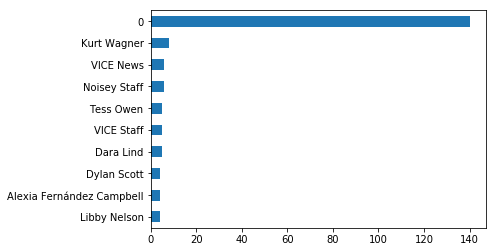

In [110]:
%matplotlib inline
df['author'].value_counts().head(10).sort_values().plot(kind='barh')

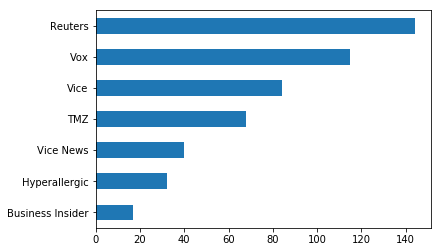

In [111]:
df['publication'].value_counts().head(10).sort_values().plot(kind='barh')

In [112]:
# Checking for Non Entries in the Data

print("Number of NaNs")
for x in range(len(df)):
    print("%-15s %10d" % (df.columns.values[x], df.iloc[:,x].isna().sum()))
print()
print("Total Entries:  ", df.shape[0])

Number of NaNs
Unnamed: 0               0
Unnamed: 0.1             0
Unnamed: 0.1.1           0
date                     0
year                     0
month                    0
day                      0
author                   0
title                    0
article                  0
url                      0
section                  0
publication              0
full_response            0
article_url              0
fb_shares                0
loveCount                0
wowCount                 0
sadCount                 0
angryCount               0
thankfulCount            0
likeCount                0
hahaCount                0
commentCount             0
fb_type                  0
fb_image                 0
upvotes                  0
reddit_comments          0


IndexError: index 28 is out of bounds for axis 0 with size 28

In [113]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,date,year,month,day,author,title,article,url,section,publication,full_response,article_url,fb_shares,loveCount,wowCount,sadCount,angryCount,thankfulCount,likeCount,hahaCount,commentCount,fb_type,fb_image,upvotes,reddit_comments
0,0,0,0,2016-12-09 18:31:00,2016,12.0,9,Lee Drutman,We should take concerns about the health of li...,"This post is part of Polyarchy, an independent...",https://www.vox.com/polyarchy/2016/12/9/138983...,0,Vox,"{'posts': [{'id': 7281564964, 'platformId': '2...",https://www.vox.com/polyarchy/2016/12/9/138983...,113,4,12,45,29,0,575,5,121,photo,https://external.xx.fbcdn.net/safe_image.php?d...,0,0
1,1,1,1,2016-10-07 21:26:46,2016,10.0,7,Scott Davis,Colts GM Ryan Grigson says Andrew Luck's contr...,The Indianapolis Colts made Andrew Luck the h...,https://www.businessinsider.com/colts-gm-ryan-...,0,Business Insider,"{'posts': [{'id': 6583051311, 'platformId': '1...",https://www.businessinsider.com/colts-gm-ryan-...,0,0,0,0,0,0,7,0,6,photo,https://external.xx.fbcdn.net/safe_image.php?d...,0,0
2,2,2,2,2018-01-26 00:00:00,2018,1.0,26,0,Trump denies report he ordered Mueller fired,"DAVOS, Switzerland (Reuters) - U.S. President ...",https://www.reuters.com/article/us-davos-meeti...,Davos,Reuters,"{'posts': [{'id': 23371385573, 'platformId': '...",https://www.reuters.com/article/us-davos-meeti...,0,0,0,0,0,0,0,0,0,photo,https://external.xx.fbcdn.net/safe_image.php?d...,0,0
3,3,3,3,2019-06-27 00:00:00,2019,6.0,27,0,France's Sarkozy reveals his 'Passions' but in...,PARIS (Reuters) - Former French president Nico...,https://www.reuters.com/article/france-politic...,World News,Reuters,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,4,4,2016-01-27 00:00:00,2016,1.0,27,0,Paris Hilton: Woman In Black For Uncle Monty's...,Paris Hilton arrived at LAX Wednesday dressed ...,https://www.tmz.com/2016/01/27/paris-hilton-mo...,0,TMZ,"{'posts': [{'id': 2044643148, 'platformId': '5...",https://www.tmz.com/2016/01/27/paris-hilton-mo...,0,0,0,0,0,0,0,0,0,photo,https://external.xx.fbcdn.net/safe_image.php?d...,0,0


#  Πάμε να δημιουργήσουμε την ημερομηνία στη σωστή μορφή γιατί σαν object δεν μας εξυπηρετεί!

In [114]:
df.dtypes

Unnamed: 0           int64
Unnamed: 0.1         int64
Unnamed: 0.1.1       int64
date                object
year                 int64
month              float64
day                  int64
author              object
title               object
article             object
url                 object
section             object
publication         object
full_response       object
article_url         object
fb_shares           object
loveCount           object
wowCount            object
sadCount            object
angryCount          object
thankfulCount       object
likeCount           object
hahaCount           object
commentCount        object
fb_type             object
fb_image            object
upvotes             object
reddit_comments     object
dtype: object

df['date'] =  pd.to_datetime(df['date'], format='%d%b%Y:%H:%M:%S.%f')

In [115]:
df['date'] =  pd.to_datetime(df['date'] )

In [116]:
df.dtypes

Unnamed: 0                  int64
Unnamed: 0.1                int64
Unnamed: 0.1.1              int64
date               datetime64[ns]
year                        int64
month                     float64
day                         int64
author                     object
title                      object
article                    object
url                        object
section                    object
publication                object
full_response              object
article_url                object
fb_shares                  object
loveCount                  object
wowCount                   object
sadCount                   object
angryCount                 object
thankfulCount              object
likeCount                  object
hahaCount                  object
commentCount               object
fb_type                    object
fb_image                   object
upvotes                    object
reddit_comments            object
dtype: object

## Αλλάζουμε όνομα 


In [117]:
df.rename(columns={'article': 'body'}, inplace=True)

## Πετάμε τις άχρηστες στήλες

In [118]:
df = df.drop(['Unnamed: 0'
              ,'Unnamed: 0.1', 'Unnamed: 0.1.1','fb_type', 'fb_image',
       'upvotes', 'reddit_comments'], axis = 1) 


In [119]:
df.columns

Index(['date', 'year', 'month', 'day', 'author', 'title', 'body', 'url',
       'section', 'publication', 'full_response', 'article_url', 'fb_shares',
       'loveCount', 'wowCount', 'sadCount', 'angryCount', 'thankfulCount',
       'likeCount', 'hahaCount', 'commentCount'],
      dtype='object')

Καθάρισμα κειμένου 

In [120]:
import string
def clean_text(article):
    clean1 = re.sub(r'['+string.punctuation + '’—”'+']', "", article.lower())
    return re.sub(r'\W+', ' ', clean1)

In [121]:
df['tokenized'] = df['body'].map(lambda x: clean_text(x))

## Μάλλον υπάρχουν νούμερα στα κείμενα, ας τα κανουμε όλα συμβολοσειρές

In [122]:
df.body = [str (item) for item in df['body']]

In [123]:
df['tokenized'] = df['body'].map(lambda x: clean_text(x))

Πόσες λέξεις υπάρχουν στα άρθρα?

In [124]:
df['num_wds'] = df['tokenized'].apply(lambda x: len(x.split()))
df['num_wds'].mean()

664.022

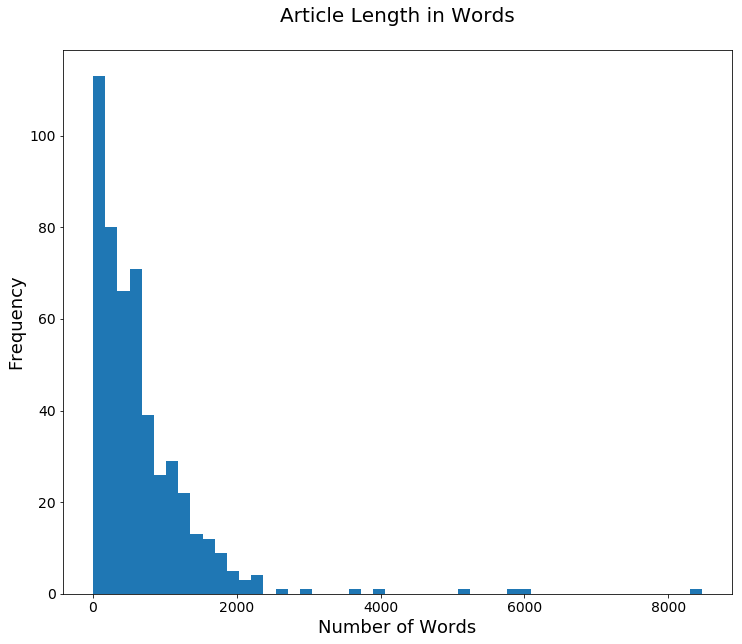

In [125]:
ax=df['num_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Article Length in Words\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Words', fontsize=18);

# Unique words

In [126]:
df['uniq_wds'] = df['tokenized'].str.split().apply(lambda x: len(set(x)))
df['uniq_wds'].head()

0    476
1    156
2     64
3    227
4     58
Name: uniq_wds, dtype: int64

In [127]:
df['uniq_wds'].mean()

299.77

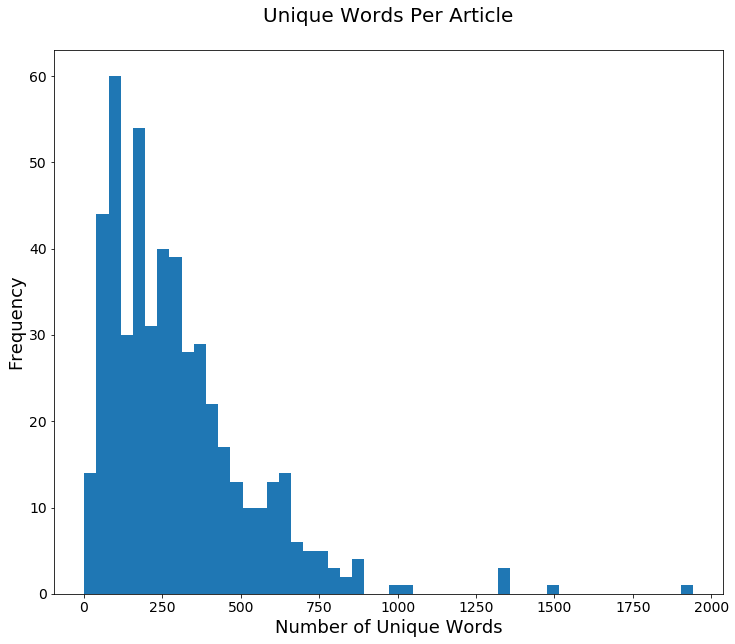

In [128]:
ax=df['uniq_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Unique Words Per Article\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Unique Words', fontsize=18);

Ποιες είναι  οι πιο συχνές λέξεις?

In [129]:
from collections import Counter

wd_counts = Counter()
for i, row in df.iterrows():
    wd_counts.update(row['tokenized'].split())

In [130]:
for sw in stopwords.words('english'):
    del wd_counts[sw]

In [131]:
wd_counts.most_common(20)

[('said', 1381),
 ('one', 873),
 ('people', 818),
 ('like', 815),
 ('would', 762),
 ('us', 729),
 ('new', 637),
 ('also', 594),
 ('trump', 586),
 ('time', 581),
 ('year', 460),
 ('even', 456),
 ('first', 453),
 ('could', 448),
 ('years', 435),
 ('two', 417),
 ('last', 387),
 ('many', 355),
 ('president', 351),
 ('house', 346)]

#  Stemming

In [132]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['tokenized'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0      thi post is part of polyarchi an independ blog...
1      the indianapoli colt made andrew luck the high...
2      davo switzerland reuter us presid donald trump...
3      pari reuter former french presid nicola sarkoz...
4      pari hilton arriv at lax wednesday dress to pa...
                             ...                        
495    detroit reuter three congression leader on mon...
496    theyv sold out carnegi hall theyv dazzl audien...
497    in the main event of ufc 194 jose aldo incred ...
498    moscow juli 9 reuter russian oil pipelin monop...
499    tradit young nation player have been brutal dr...
Name: tokenized, Length: 500, dtype: object

Ας  δούμε και με άλλο τρόπο

In [133]:
from textblob import Word
df['lemmatized'] = df['tokenized'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['lemmatized'].head()

0    this post is part of polyarchy an independent ...
1    the indianapolis colt made andrew luck the hig...
2    davos switzerland reuters u president donald t...
3    paris reuters former french president nicolas ...
4    paris hilton arrived at lax wednesday dressed ...
Name: lemmatized, dtype: object

## Εισάγουμε και το λεξικό VADER που μετρά πολικότητα

In [134]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/catherine/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [135]:

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

for i in range(df.shape[0]): 
    df.loc[i, "polarity"] = abs(sid.polarity_scores(df.loc[i, 'lemmatized'])['compound'])
    df.loc[i, "negativity"] = abs(sid.polarity_scores(df.loc[i, 'lemmatized'])['neg'])
    df.loc[i, "neutrality"] = abs(sid.polarity_scores(df.loc[i, 'lemmatized'])['neu'])
    df.loc[i, "positivity"] = abs(sid.polarity_scores(df.loc[i, 'lemmatized'])['pos'])



In [136]:
#Title

for i in range(df.shape[0]): 
    df.loc[i, "title_polarity"] = abs(sid.polarity_scores(df.loc[i, "title"])['compound'])


In [137]:
 df.head(1)

,date,year,month,day,author,title,body,url,section,publication,full_response,article_url,fb_shares,loveCount,wowCount,sadCount,angryCount,thankfulCount,likeCount,hahaCount,commentCount,tokenized,num_wds,uniq_wds,lemmatized,polarity,negativity,neutrality,positivity,title_polarity
0,2016-12-09 18:31:00,2016,12.0,9,Lee Drutman,We should take concerns about the health of li...,"This post is part of Polyarchy, an independent...",https://www.vox.com/polyarchy/2016/12/9/138983...,0,Vox,"{'posts': [{'id': 7281564964, 'platformId': '2...",https://www.vox.com/polyarchy/2016/12/9/138983...,113,4,12,45,29,0,575,5,121,this post is part of polyarchy an independent ...,1099,476,this post is part of polyarchy an independent ...,0.9931,0.164,0.704,0.132,0.1779


# NRC LEXICON Συναισθήματα

In [138]:
filepath = "NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index()
emolex_df.head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,NaN,0,0,0,0,0,0,0,0,0,0
1,aback,0,0,0,0,0,0,0,0,0,0
2,abacus,0,0,0,0,0,0,0,0,0,1
3,abandon,0,0,0,1,0,1,0,1,0,0
4,abandoned,1,0,0,1,0,1,0,1,0,0


In [139]:
from sklearn.feature_extraction.text import TfidfVectorizer
#CountVectorizer(stop_words='english', binary=True)
# I only want you to look for words in the emotional lexicon
# because we don't know what's up with the other words
vec = TfidfVectorizer(vocabulary=emolex_df.word,
                      use_idf=False, 
                      norm= None ) #'l1') # ELL - ONE
matrix = vec.fit_transform(df['lemmatized'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

,NaN,aback,abacus,abandon,abandoned,abandonment,abate,abatement,abba,abbot,abbreviate,abbreviation,abdomen,abdominal,abduction,aberrant,aberration,abeyance,abhor,abhorrent,abide,ability,abject,ablation,ablaze,abnormal,aboard,abode,abolish,abolition,abominable,abomination,aboriginal,abort,abortion,abortive,abound,abovementioned,abrasion,abroad,abrogate,abrupt,abruptly,abscess,absence,absent,absentee,absenteeism,absinthe,absolute,...,yank,yard,yarn,yaw,yawn,yawning,yea,year,yearbook,yearling,yearly,yearn,yearning,years,yeast,yell,yellow,yellows,yelp,yeoman,yesterday,yesteryear,yew,yield,yielding,yogi,yoke,yolk,yon,yonder,young,younger,youth,zany,zap,zeal,zealot,zealous,zebra,zenith,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoological,zoology,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
# Get your list of positive words

angry_words = emolex_df[emolex_df.anger == 1]['word']

positive_words = emolex_df[emolex_df.positive == 1]['word']

# Get your list of sadness words
sadness_words = emolex_df[emolex_df.sadness == 1]['word']

# Get your list of surprise words
surprise_words = emolex_df[emolex_df.surprise == 1]['word']

# Get your list of disgust words
disgust_words = emolex_df[emolex_df.disgust == 1]['word']

# Get your list of anticipation words
anticipation_words = emolex_df[emolex_df.anticipation == 1]['word']

# Get your list of negative words
negative_words = emolex_df[emolex_df.negative == 1]['word']

# Get your list of joy words
joy_words = emolex_df[emolex_df.joy == 1]['word']

# Get your list of trust words
trust_words = emolex_df[emolex_df.trust == 1]['word']

# Get your list of fear words
fear_words = emolex_df[emolex_df.fear == 1]['word']


In [141]:
df['anger'] = (wordcount_df[angry_words].sum(axis=1) / df['uniq_wds']) *100

df['joy'] = (wordcount_df[joy_words].sum(axis=1) / df['uniq_wds']) *100

df['disgust'] = (wordcount_df[disgust_words].sum(axis=1) / df['uniq_wds']) *100

df['surprise'] = (wordcount_df[surprise_words].sum(axis=1) / df['uniq_wds']) *100

df['trust'] = (wordcount_df[trust_words].sum(axis=1) / df['uniq_wds']) *100

df['anticipation'] = (wordcount_df[anticipation_words].sum(axis=1) / df['uniq_wds']) *10

df['sadness'] = (wordcount_df[sadness_words].sum(axis=1) / df['uniq_wds']) *100

df['fear'] = (wordcount_df[fear_words].sum(axis=1) / df['uniq_wds']) *100

## Και τέλος η υποκειμενικότητα!

In [142]:
from textblob import TextBlob, Word

#def detect_polarity(text):
#    return TextBlob(text).sentiment.polarity
def detect_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

### Σώζουμε το αρχείο!

In [143]:
df.to_csv('news_clean.csv', index = False)